## **Rencontrez la valeur aberrante**

En statistique, une valeur aberrante est un point d'observation éloigné des autres observations.

## **Collecte de données et valeurs aberrantes**
- Comme nous savons maintenant ce qu'est une valeur aberrante, mais vous demandez-vous également comment une valeur aberrante a-t-elle été introduite dans la population ?

- Le projet Data Science commence par la collecte de données et c'est à ce moment que les valeurs aberrantes sont introduites pour la première fois dans la population. 
- Cependant, vous ne saurez rien des valeurs aberrantes lors de la phase de collecte. Les valeurs aberrantes peuvent être le résultat d'une erreur lors de la collecte de données ou simplement une indication de variance dans vos données.

- Voyons quelques exemples. Supposons qu'on vous ait demandé d'observer les performances de d'une équipe de cricket, c'est-à-dire la course réalisée par chaque joueur et de collecter les données.

![image](https://user-images.githubusercontent.com/123748165/228197676-18adb2a0-287d-49ae-98dc-295caf7ebb2f.png)


- Comme vous pouvez le voir à partir des données collectées ci-dessus, tous les autres joueurs ont marqué plus de 300 à l'exception de Player3 qui a marqué 10.

- Ce chiffre peut être juste une erreur de frappe ou il montre la variance de vos données et indique que Player3 fonctionne très mal donc, a besoin améliorations.

- Maintenant que nous savons que les valeurs aberrantes peuvent être une erreur ou simplement une variance, comment décideriez-vous si elles sont importantes ou non. 
- Eh bien, c'est assez simple s'ils sont le résultat d'une erreur, alors nous pouvons les ignorer, mais s'il ne s'agit que d'une variance dans les données, nous aurions besoin de réfléchir un peu plus loin. 
- Avant d'essayer de comprendre s'il faut ignorer ou non les valeurs aberrantes, nous devons connaître les moyens de les identifier.

In [ ]:
pip install scikit-learn==1.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Import the libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston,load_iris

## **Trouver des valeurs aberrantes**
- Pour faciliter la découverte des valeurs aberrantes, nous disposons de nombreuses méthodes en statistique, mais nous n'en aborderons que quelques-unes. La plupart du temps, nous essaierons de voir des méthodes de visualisation (les plus simples) plutôt mathématiques.

- Nous utiliserons le Boston House Pricing Dataset . Nous allons charger le jeu de données et séparer les features et la cible.

In [ ]:
#Load the data
boston = load_boston()

#Find features and target
x = boston.data
y = boston.target

#Find the dic keys
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
#find features name
columns = boston.feature_names
columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
#Description of dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
#Create dataframe
boston_df = pd.DataFrame(boston.data)
#Créer une dataframe de boston.data
boston_df.columns = columns
boston_df_o = boston_df
#afficher la taille de boston_df
print(boston_df.shape)
#afficher les 5 premiers lignes de la dataframe boston_df
boston_df.head()

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


- Les caractéristiques/variables indépendantes seront utilisées pour rechercher toute valeur aberrante. En regardant les données ci-dessus, il semble que nous n'ayons que des valeurs numériques, c'est-à-dire que nous n'avons pas besoin de formater les données.

- Il existe deux types d'analyse que nous suivrons pour trouver les valeurs aberrantes - Uni-variable (analyse des valeurs aberrantes à une variable) et multivariée (analyse des valeurs aberrantes à deux variables ou plus). 
- Pour garder les choses simples, nous commencerons par la méthode de base de détection des valeurs aberrantes et passerons lentement aux méthodes avancées.

## **Découvrez les valeurs aberrantes avec des outils de visualisation**
**Boîte à moustaches-**



<Axes: xlabel='DIS'>

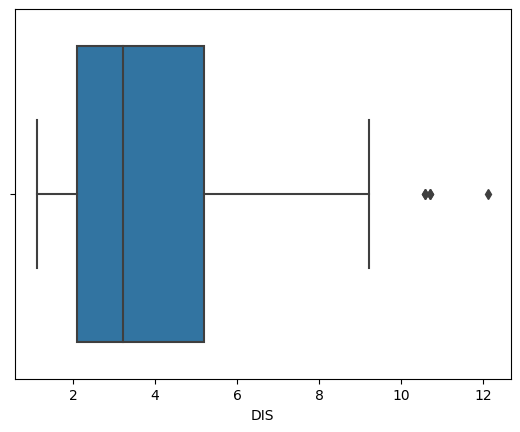

In [ ]:
#Oulier detection - Univarite - Boxplot
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.boxplot(x=boston_df['DIS'])

- Le graphique ci-dessus montre trois points entre 10 et 12, ce sont des valeurs aberrantes car elles ne sont pas incluses dans la case des autres observations, c'est-à-dire nulle part près des quartiles.

- Ici, nous avons analysé la valeur aberrante univariée, c'est-à-dire que nous avons utilisé la colonne DIS uniquement pour vérifier la valeur aberrante. Mais nous pouvons également effectuer une analyse multivariée des valeurs aberrantes. 
- Peut-on faire l'analyse multivariée avec Box plot ? 
    - Eh bien, cela dépend, si vous avez des valeurs catégorielles, vous pouvez les utiliser avec n'importe quelle variable continue et effectuer une analyse multivariée des valeurs aberrantes. 
    - Comme nous n'avons pas de valeur catégorique dans notre ensemble de données Boston Housing, nous devrons peut-être oublier d'utiliser la boîte à moustaches pour l'analyse multivariée des valeurs aberrantes.

## **Nuage de points-**

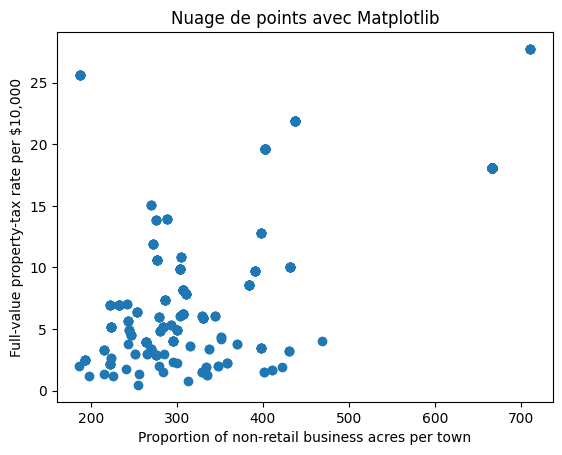

In [ ]:
#Multivariate outlier analysis
#Tracer un graphe de nuage de points en utilisant les colonnes 'TAX'(la renommer dans le graphe : 'Proportion of non-retail business acres per town') et 'INDUS'(la renommer dans le graphe : ''Full-value property-tax rate per $10,000')
plt.scatter(x=boston_df['TAX'],y=boston_df['INDUS'])

plt.title('Nuage de points avec Matplotlib')

plt.xlabel('Proportion of non-retail business acres per town')

plt.ylabel('Full-value property-tax rate per $10,000')

plt.show()

- En regardant le graphique ci-dessus, nous pouvons dire que la plupart des points de données se trouvent en bas à gauche, mais il y a des points qui sont éloignés de la population comme le coin supérieur droit.

## **Découvrez les valeurs aberrantes avec une fonction mathématique**
**Z-Score-**

- Le score Z est le nombre signé d'écarts types par lequel la valeur d'une observation ou d'un point de données est supérieure à la valeur moyenne de ce qui est observé ou mesuré.

- L'intuition derrière Z-score est de décrire n'importe quel point de données en trouvant leur relation avec l'écart type et la moyenne du groupe de points de données. 
- Le score Z consiste à trouver la distribution des données où la moyenne est de 0 et l'écart type est de 1, c'est-à-dire la distribution normale.

- Vous devez vous demander comment cela aide-t-il à identifier les valeurs aberrantes ? 
    - Eh bien, lors du calcul du score Z, nous redimensionnons et centrons les données et recherchons les points de données trop éloignés de zéro. 
    - Ces points de données qui sont bien trop éloignés de zéro seront traités comme des valeurs aberrantes. Dans la plupart des cas, un seuil de 3 ou -3 est utilisé, c'est-à-dire que si la valeur du score Z est supérieure ou inférieure à 3 ou -3 respectivement, ce point de données sera identifié comme des valeurs aberrantes.

- Nous utiliserons la fonction Z-score définie dans la bibliothèque scipy pour détecter les valeurs aberrantes.

In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(boston_df))
print(z)

         CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0    0.419782  0.284830  1.287909  0.272599  0.144217  0.413672  0.120013   
1    0.417339  0.487722  0.593381  0.272599  0.740262  0.194274  0.367166   
2    0.417342  0.487722  0.593381  0.272599  0.740262  1.282714  0.265812   
3    0.416750  0.487722  1.306878  0.272599  0.835284  1.016303  0.809889   
4    0.412482  0.487722  1.306878  0.272599  0.835284  1.228577  0.511180   
..        ...       ...       ...       ...       ...       ...       ...   
501  0.413229  0.487722  0.115738  0.272599  0.158124  0.439316  0.018673   
502  0.415249  0.487722  0.115738  0.272599  0.158124  0.234548  0.288933   
503  0.413447  0.487722  0.115738  0.272599  0.158124  0.984960  0.797449   
504  0.407764  0.487722  0.115738  0.272599  0.158124  0.725672  0.736996   
505  0.415000  0.487722  0.115738  0.272599  0.158124  0.362767  0.434732   

          DIS       RAD       TAX   PTRATIO         B     LSTAT  
0    0.14

- En regardant le code et la sortie ci-dessus, il est difficile de dire quel point de données est une valeur aberrante. Essayons de définir un seuil pour identifier une valeur aberrante.

In [ ]:
z.shape

(506, 13)

In [ ]:
threshold = 3
#Afficher les valeurs de z > 3 
print(z[z>threshold])
filtered = z[z>threshold]
print(filtered.dropna(how='all'))
print(filtered.dropna(axis=1, how='all'))
filtered.dropna(how='all').dropna(axis=1, how='all')

#Merci Ellie
#row_indexes, col_indexes = np.where(z.values > threshold)
#pd.DataFrame(zip(row_indexes, col_indexes))

#Correction
#values_above_threshold = np.extract(np.logical_and(z > threshold, ~np.isnan(z)), z)
#print(values_above_threshold)

     CRIM  ZN  INDUS  CHAS  NOX  RM  AGE  DIS  RAD  TAX  PTRATIO   B  LSTAT
0     NaN NaN    NaN   NaN  NaN NaN  NaN  NaN  NaN  NaN      NaN NaN    NaN
1     NaN NaN    NaN   NaN  NaN NaN  NaN  NaN  NaN  NaN      NaN NaN    NaN
2     NaN NaN    NaN   NaN  NaN NaN  NaN  NaN  NaN  NaN      NaN NaN    NaN
3     NaN NaN    NaN   NaN  NaN NaN  NaN  NaN  NaN  NaN      NaN NaN    NaN
4     NaN NaN    NaN   NaN  NaN NaN  NaN  NaN  NaN  NaN      NaN NaN    NaN
..    ...  ..    ...   ...  ...  ..  ...  ...  ...  ...      ...  ..    ...
501   NaN NaN    NaN   NaN  NaN NaN  NaN  NaN  NaN  NaN      NaN NaN    NaN
502   NaN NaN    NaN   NaN  NaN NaN  NaN  NaN  NaN  NaN      NaN NaN    NaN
503   NaN NaN    NaN   NaN  NaN NaN  NaN  NaN  NaN  NaN      NaN NaN    NaN
504   NaN NaN    NaN   NaN  NaN NaN  NaN  NaN  NaN  NaN      NaN NaN    NaN
505   NaN NaN    NaN   NaN  NaN NaN  NaN  NaN  NaN  NaN      NaN NaN    NaN

[506 rows x 13 columns]
     CRIM        ZN  INDUS  CHAS  NOX  RM  AGE  DIS  RAD  TAX  

Ne soyez pas confus par les résultats. Le premier tableau contient la liste des numéros de ligne et le second tableau des numéros de colonne respectifs, ce qui signifie que z[55][1] ont un score Z supérieur à 3.

**Score IQR -**

La boîte à moustaches utilise la méthode IQR pour afficher les données et les valeurs aberrantes (forme des données), mais pour obtenir une liste des valeurs aberrantes identifiées, nous devrons utiliser la formule mathématique et récupérer les données aberrantes.

- L' intervalle interquartile ( IQR ), également appelé midspread ou middle 50% , ou techniquement H-spread , est une mesure de la dispersion statistique, étant égale à la différence entre les 75e et 25e centiles, ou entre les quartiles supérieur et inférieur, IQR = Q 3 - Q 1.

- En d'autres termes, l'IQR est le premier quartile soustrait du troisième quartile ; ces quartiles sont clairement visibles sur une boîte à moustaches sur les données.

- Il s'agit d'une mesure de la dispersion similaire à l'écart-type ou à la variance, mais beaucoup plus robuste vis-à-vis des valeurs aberrantes.

- L'IQR est quelque peu similaire au score Z en termes de recherche de la distribution des données, puis de maintien d'un certain seuil pour identifier la valeur aberrante.

- Nous allons d'abord calculer l'IQR,

In [ ]:
Q1 = boston_df_o.quantile(0.25)
Q3 = boston_df_o.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


- Maintenant que nous savons comment détecter les valeurs aberrantes, il est important de comprendre si elles doivent être supprimées ou corrigées. Dans la section suivante, nous examinerons quelques méthodes pour supprimer les valeurs aberrantes et, si nécessaire, imputer de nouvelles valeurs.

# Removing Outliers 

## **Travailler avec les valeurs aberrantes : corriger, supprimer**
- Lors de l'analyse des données, lorsque vous détectez la valeur aberrante, l'une des décisions les plus difficiles pourrait être de savoir comment traiter la valeur aberrante. 
- Doit-on les supprimer ou les corriger ? Avant d'en parler, nous allons examiner quelques méthodes pour supprimer les valeurs aberrantes.

**Score Z**

- Dans la section précédente, nous avons vu comment détecter la valeur aberrante à l'aide du score Z, mais nous souhaitons maintenant supprimer ou filtrer les valeurs aberrantes et obtenir des données propres. 
- Cela peut être fait avec une seul ligne de code car nous avons déjà calculé le Z-score.

In [ ]:
z<3

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,True,True,True,True,True,True,True,True,True,True,True,True,True
502,True,True,True,True,True,True,True,True,True,True,True,True,True
503,True,True,True,True,True,True,True,True,True,True,True,True,True
504,True,True,True,True,True,True,True,True,True,True,True,True,True


In [ ]:
#  supprimer toutes les lignes (observations) de boston_df_o pour lesquelles la valeur absolue du score z de chaque variable (colonne) est supérieure à 3.
# Ajouter la méthode all(axis=1) est utilisée pour s'assurer que toutes les variables (colonnes) ont des scores z inférieurs à 3 pour chaque observation.  
boston_df_o = boston_df_o[(z < 3).all(axis=1)]

<ipython-input-124-7b02db4f2162>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  boston_df_o = boston_df_o[(z < 3).all(axis=1)]


In [ ]:
boston_df.shape

(506, 13)

In [ ]:
boston_df_o.shape

(415, 13)

- Ainsi, le code ci-dessus a supprimé environ 90 lignesde l'ensemble de données, c'est-à-dire que les valeurs aberrantes ont été supprimées.

**Score IQR -**

- Tout comme le score Z, nous pouvons utiliser le score IQR précédemment calculé pour filtrer les valeurs aberrantes en ne conservant que les valeurs valides.

In [ ]:
boston_df_o1 = boston_df

In [ ]:
Q1 = boston_df_o1.quantile(0.25)
Q3 = boston_df_o1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

boston_df_out = boston_df_o1[~((boston_df_o1 < (Q1 - 1.5 * IQR)) |(boston_df_o1 > (Q3 + 1.5 * IQR))).any(axis=1)]

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


In [ ]:
boston_df_out.shape

(274, 13)